In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [3]:
bos_hous=load_boston()

In [4]:
column_name=bos_hous.feature_names
df_boston=pd.DataFrame(bos_hous.data)
df_boston.columns=column_name
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Visualization

In [5]:
# Using Box Plot
# It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

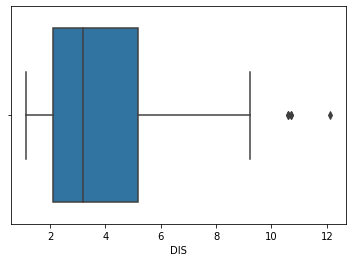

In [6]:
 import warnings
 %matplotlib inline
 import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
sns.boxplot(df_boston['DIS'])
plt.show()

In [7]:
import numpy as np
print(np.where(df_boston['DIS']>10))

(array([351, 352, 353, 354, 355], dtype=int64),)


In [8]:
# Using ScatterPlot

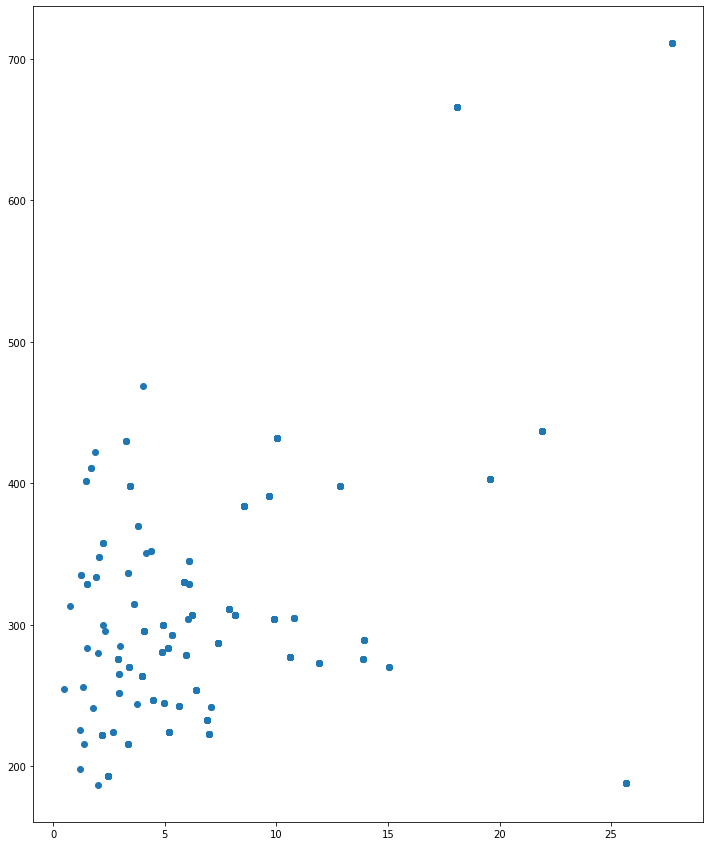

In [9]:
fig,ax= plt.subplots(figsize=(12,15))
ax.scatter(df_boston['INDUS'],df_boston['TAX'])

In [10]:
 ## Z-score

In [11]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(df_boston['DIS']))
print(z)

0      0.140214
1      0.557160
2      0.557160
3      1.077737
4      1.077737
         ...   
501    0.625796
502    0.716639
503    0.773684
504    0.668437
505    0.613246
Name: DIS, Length: 506, dtype: float64


In [12]:
# 3. IQR (Inter Quartile Range) IQR (Inter Quartile Range) Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. IQR=Q3-Q1

In [13]:

# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [14]:
# To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

In [15]:
# upper = Q3 +1.5*IQR
# lower = Q1 – 1.5*IQR
# In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [16]:
# Above Upper bound
upper = df_boston['DIS'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = df_boston['DIS'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Upper bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([351, 352, 353, 354, 355], dtype=int64),)
Lower bound: 0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Name: DIS, Length: 506, dtype: bool
(array([], dtype=int64),)


In [ ]:

threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

## Full Code: Detecting the outliers using IQR and removing them.

In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_boston
import pandas as pd
 
# Load the dataset
bos_hou = load_boston()
 
# Create the dataframe
column_name = bos_hou.feature_names
df_boston = pd.DataFrame(bos_hou.data)
df_boston.columns = column_name
df_boston.head()
 
''' Detection '''
# IQR
Q1 = np.percentile(df_boston['DIS'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_boston['DIS'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_boston.shape)
 
# Upper bound
upper = np.where(df_boston['DIS'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_boston['DIS'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_boston.drop(upper[0], inplace = True)
df_boston.drop(lower[0], inplace = True)
 
print("New Shape: ", df_boston.shape)

Old Shape:  (506, 13)
New Shape:  (501, 13)
